In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.optimize as optimize

In [147]:
# Generate noisy data
def generate_noisy_data(alpha, beta):
    x = np.linspace(0, 1, 101)  # x_k values
    delta = np.random.normal(0.5, 0.125, 101)  # Adjusted noise factor
    y = alpha * x + beta + delta
    return x, y

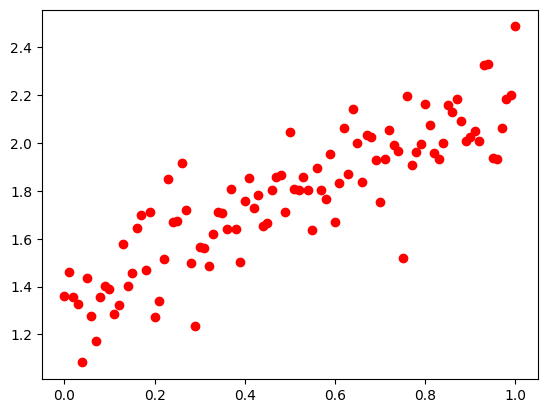

In [155]:
# Generate random alpha and beta
alpha = np.random.rand()
beta = np.random.rand()

# Generate noisy data
x, y = generate_noisy_data(alpha, beta)
 
plt.scatter(x, y, c='r')

In [156]:
# create gradient descent function
def gradient_descent(x, y, w, b, lr, func_type):
    # initialize variable
    d1dw = 0.0
    d1db = 0.0
    N= x.shape[0]
    
    # loss linear = (wx + b - y) ** 2
    # loss rational = (b / (1 + wx) - y) ** 2
    for xi, yi in zip(x, y):
        # gradient step
        if func_type == 'linear':
            d1dw += 2 * (w * xi + b - yi) * xi
            d1db += 2 * (w * xi + b - yi)
        else:
            d1dw += 2 * (w / (1 + b * xi) - yi) / (1 + b * xi)
            d1db += 2 * (w / (1 + b * xi) - yi) * (- xi * w / (1 + b * xi) ** 2)
    
    # make an updates to the parameters
    w = w - lr * (1 / N) * d1dw
    b = b - lr * (1 / N) * d1db
    return w, b

Optimized parameters (w, b): 0.8825443531993287 1.3314559062985052


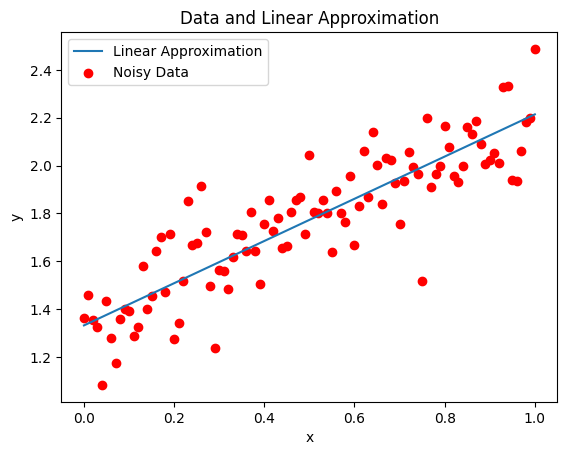

In [157]:
# Initialize parameters
w = np.random.rand()  # Weight
b = np.random.rand()  # Bias

# Define hyperparameters
lr = 0.01  # Learning rate
num_iterations = 1000

# Train the model using gradient descent
for i in range(num_iterations):
    w, b = gradient_descent(x, y, w, b, lr, func_type='linear')

# Print the optimized parameters
print("Optimized parameters (w, b):", w, b)

# Visualize the data and the linear approximation
plt.plot(x, linear_function(x, w, b), label='Linear Approximation')
plt.scatter(x, y, c='r', label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Linear Approximation')
plt.show()


In [158]:
GD_linear = linear_function(x, w, b)

Optimized parameters (w, b) for the rational function: 1.4182030786511524 -0.37195455737430766


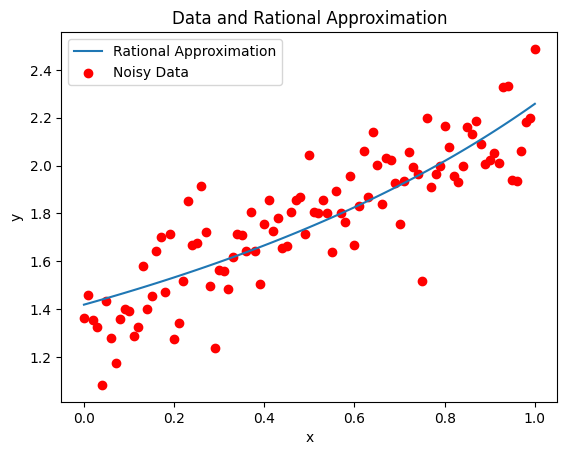

In [159]:
# Initialize parameters
w = np.random.rand()  # Weight
b = np.random.rand()  # Bias

# Define hyperparameters
lr = 0.01  # Learning rate
num_iterations = 1000

# Train the model using gradient descent
for i in range(num_iterations):
    w, b = gradient_descent(x, y, w, b, lr, func_type='rational')

# Print the optimized parameters
print("Optimized parameters (w, b) for the rational function:", w, b)

# Visualize the data and the rational approximation
plt.plot(x, rational_function(x, w, b), label='Rational Approximation')
plt.scatter(x, y, c='r', label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Rational Approximation')
plt.show()


In [160]:
GD_rat = rational_function(x, w, b)

In [161]:
# create approximation functions
def linear(wb):
    w, b = wb
    return np.sum((w * x + b - y) ** 2, axis=0)

def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * x) - y) ** 2, axis=0)

Start training for <function linear at 0x7f260dcfa9e0>
Optimization terminated successfully.
         Current function value: 1.997093
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Founded values: (0.8590326850949798, 1.34405643658127), real values: (0.8852814595676639, 0.8401872671487948)
 
Start training for <function rational at 0x7f260dcfb7f0>
Optimization terminated successfully.
         Current function value: 2.191755
         Iterations: 10
         Function evaluations: 75
         Gradient evaluations: 25
Founded values: (1.418644954690504, -0.37163378212277365), real values: (0.8852814595676639, 0.8401872671487948)
 


/tmp/ipykernel_1047/1150163437.py:8: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})


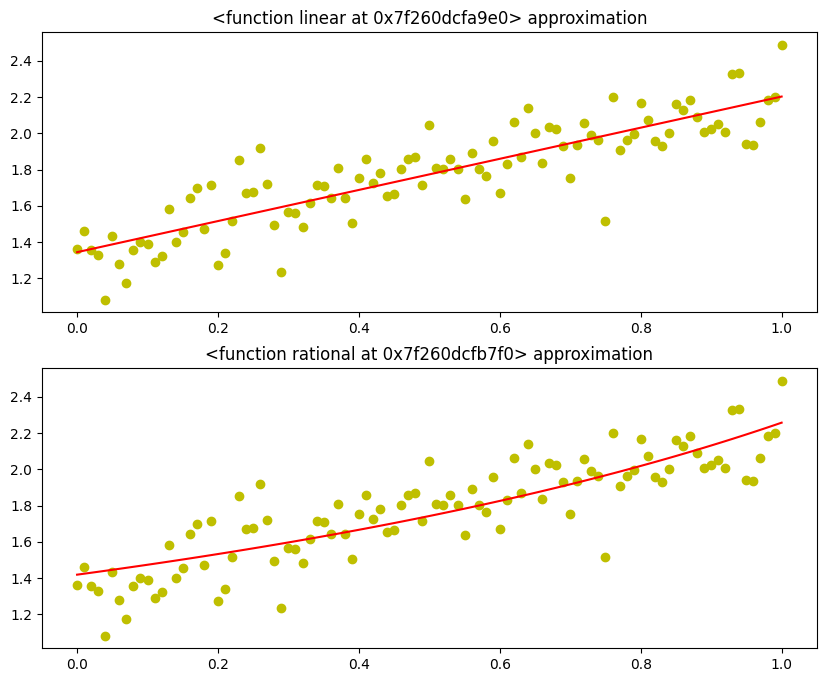

In [162]:
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})
    w, b = CGD.x
    
    # plot graphs
    axs[i].scatter(x, y, c='y')
    if func == linear:
        CGD_linear = CGD.x
        axs[i].plot(x, w * x + b, 'r')
    else:
        CGD_rat = CGD.x
        axs[i].plot(x, w / (1 + b * x), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

In [163]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return np.sum((w * x + b - y) ** 2, axis=0)

def d_linear(wb):
    w, b = wb
    return np.array([np.sum(2 * x * (b + w * x - y)), np.sum(2 * (b + w * x - y))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * x**2)
    hess[0,1] = np.sum(2 * x)
    hess[1,0] = np.sum(2 * x)
    hess[1,1] = (2)
    return hess

# for rational
def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * x) - y) ** 2, axis=0)

def d_rational(wb):
    w, b = wb
    return np.array([np.sum((w/(1+b*x) - y)*2/(1+b*x)), np.sum(2*w*x/(1+b*x)**2 * (w/(1+b*x)-y))])

def hess_rat(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*x)**2)
    hess[0,1] = np.sum(-2*w*x/(1+b*x)**3-2*x*(w/(1+b*x)-y) / (1+b*x)**3)
    hess[1,0] = np.sum(-2*w*x/(1+b*x)**3-2*x*(w/(1+b*x)-y) / (1+b*x)**3)
    hess[1,1] = np.sum(2 * w**2 * x**2 / (1+b*x)**4 * 4 * w * x**2 * (w/(1+b*x)-y) / (1+b*x)**3)
    return hess

Start training for <function linear at 0x7f2607beeef0>
Optimization terminated successfully.
         Current function value: 1.997800
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Hessian evaluations: 21
Founded values: (0.8680444011077596, 1.3398691547170771), real values: (0.8852814595676639, 0.8401872671487948)
 
Start training for <function rational at 0x7f2607bef520>
         Current function value: 6.405347
         Iterations: 1
         Function evaluations: 50
         Gradient evaluations: 39
         Hessian evaluations: 2
Founded values: (1.2226978871223635, -0.4066459861460636), real values: (0.8852814595676639, 0.8401872671487948)
 


/home/bakhovaddinov/algo-labs/labs/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2133: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)


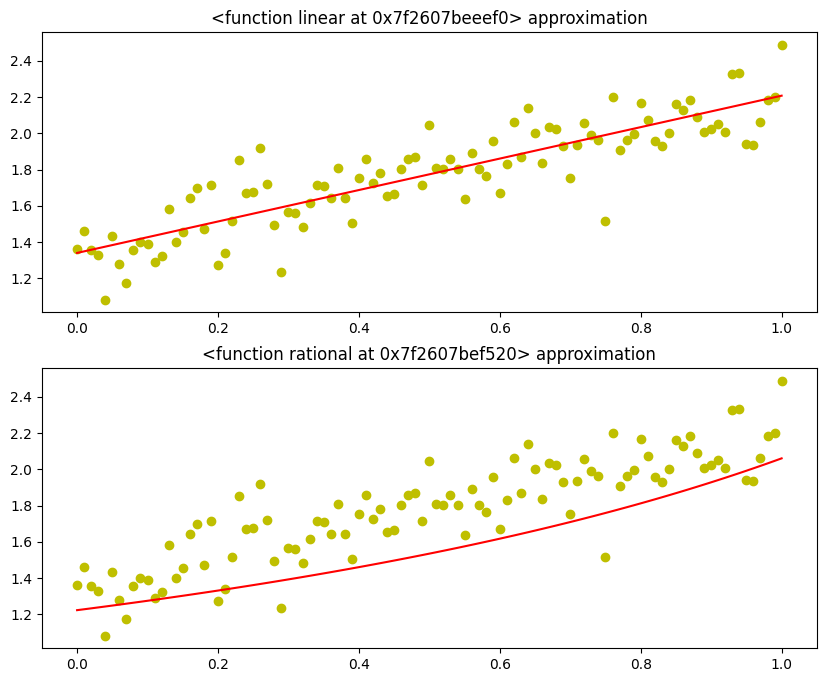

In [164]:
# types of approximation fuctions
func_types = [linear, rational]
jac_types = [d_linear, d_rational]
hess_types = [hess_lin, hess_rat]
start_values = [[1.0, 1.0], [1.1, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, jac, hess, start) in enumerate(zip(func_types, 
                                          jac_types, 
                                          hess_types,
                                          start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method
    newton = minimize(func, start, method='Newton-CG', jac=jac, hess=hess, options={'xtol': 1e-3, 'disp':True})
    w, b = newton.x
    
    # plot graphs
    axs[i].scatter(x, y, c='y')
    if func == linear:
        Newton_linear = newton.x
        axs[i].plot(x, w * x + b, 'r')
    else:
        Newton_rat = newton.x
        axs[i].plot(x, w / (1 + b * x), 'r')
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

In [165]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return (w * x + b - y) ** 2

# for rational
def rational(wb):
    w, b = wb
    return (w / (1 + b * x) - y) ** 2

Start training for <function linear at 0x7f2607a7a950>
Founded values: (0.8377350886078949, 1.342934297655298), real values: (0.8852814595676639, 0.8401872671487948)
 
Start training for <function rational at 0x7f2607a7a4d0>
Founded values: (1.4090327999230805, -0.3693397489639602), real values: (0.8852814595676639, 0.8401872671487948)
 


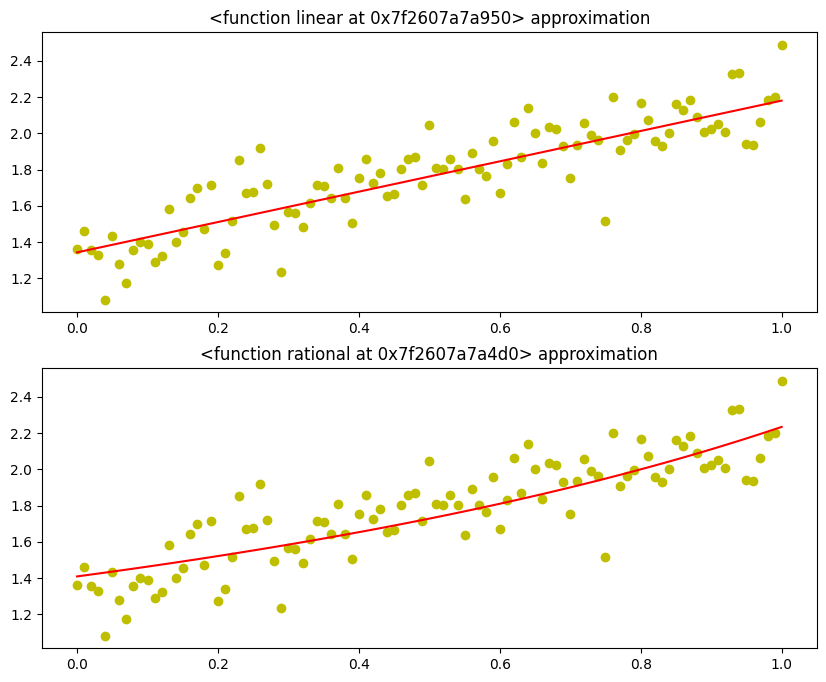

In [166]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    lma = optimize.least_squares(func, start, method="lm", xtol=1e-3)
    w, b = lma.x
    
    # plot graphs
    axs[i].scatter(x, y, c='y')
    if func == linear:
        lma_linear = lma.x
        axs[i].plot(x, w * x + b, 'r')
    else:
        lma_rat = lma.x
        axs[i].plot(x, w / (1 + b * x), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

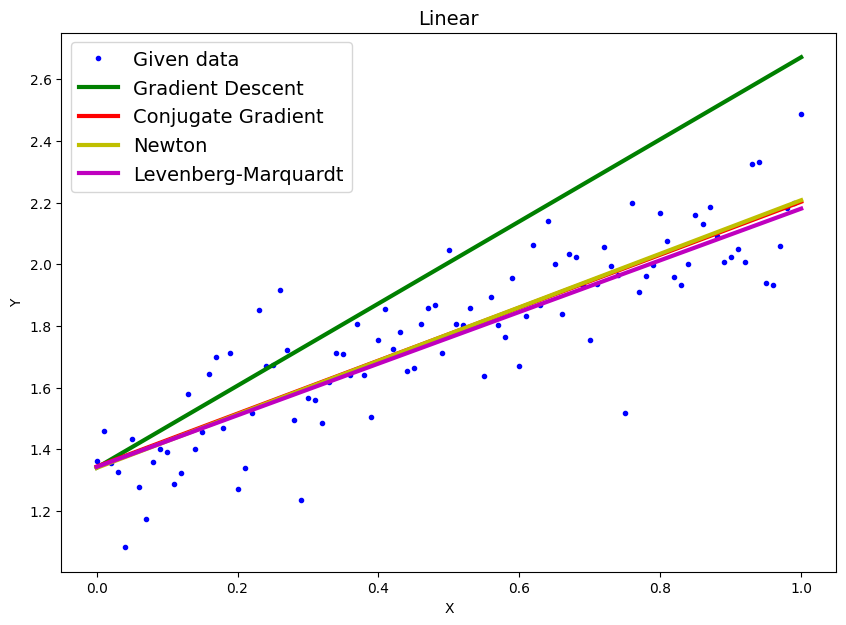

In [167]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, GD_linear[0]*x + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(x, CGD_linear[0]*x + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(x, Newton_linear[0]*x + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(x, lma_linear[0]*x + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

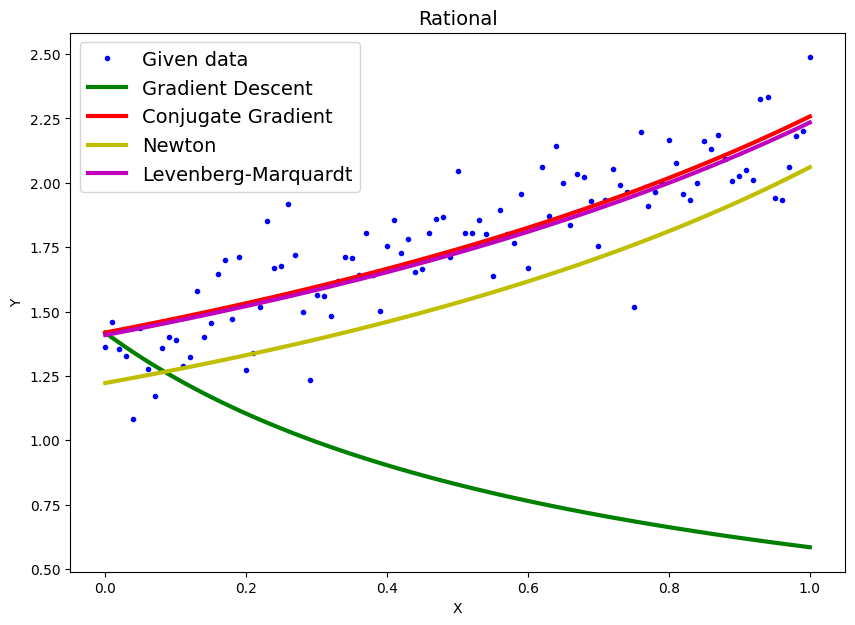

In [168]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, GD_rat[0] / (1 + GD_rat[1]*x), 'g', label="Gradient Descent", linewidth=3)
plt.plot(x, CGD_rat[0] /(1 + CGD_rat[1]*x), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(x, Newton_rat[0] / (1 + Newton_rat[1]*x), 'y', label="Newton", linewidth=3)
plt.plot(x, lma_rat[0] / (1 + lma_rat[1]*x), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)